In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline


In [2]:
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf
config = tf.ConfigProto()  
config.gpu_options.allow_growth=True   
session = tf.Session(config=config)
KTF.set_session(session)

Using TensorFlow backend.


In [3]:
import keras 
from models.psenet import psenet

In [4]:
shape = (None,None,3)

In [5]:
inputs = keras.layers.Input(shape=shape)
output = psenet(inputs)
model  = keras.models.Model(inputs,output)
model.summary()

C:\Program Files\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           lambda_1[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]           

In [6]:
from keras.optimizers import Adam
from models.loss import build_loss
from models.metrics import build_iou,mean_iou
from keras.utils import multi_gpu_model

In [7]:
parallel_model = multi_gpu_model(model)

(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)


In [8]:
adam = Adam(1e-4)

In [9]:
ious = build_iou([0,1],['bk','txt'])

In [10]:
parallel_model.compile(loss=build_loss,
              optimizer=adam,
              metrics=ious)

In [11]:
import config 
from tool.generator import Generator

In [17]:
train_dir = config.MIWI_2018_TRAIN_LABEL_DIR
test_dir = config.MIWI_2018_TEST_LABEL_DIR
batch_size = 8
num_class =2 
shape = (640,640)

In [18]:
gen_train = Generator(train_dir,batch_size = batch_size ,istraining=True,num_classes=num_class,mirror = False,reshape=shape)

In [19]:
gen_test = Generator(test_dir,batch_size = batch_size ,istraining=False,num_classes=num_class,
                     reshape=shape,mirror=False,scale=False,clip=False,trans_color=False)

In [20]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
checkpoint = ModelCheckpoint(r'resent50-190219_BLINEAR-{epoch:02d}.hdf5',
                           save_weights_only=True)
tb = TensorBoard(log_dir='./logs', update_freq=10)

In [21]:
res = parallel_model.fit_generator(gen_train,
                          steps_per_epoch =gen_train.num_samples()// batch_size,
                          epochs = 40,
                          validation_data=gen_test,
                          validation_steps =gen_test.num_samples()//batch_size,
                          verbose=1,
                          initial_epoch=0,
                          workers=4,
                          max_queue_size=16,
                          callbacks=[checkpoint,tb])

Epoch 1/40


ResourceExhaustedError: OOM when allocating tensor with shape[8,192,320,320] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node concatenate_4/concat}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](concatenate_4/concat-0-TransposeNHWCToNCHW-LayoutOptimizer, activation_1/Relu, training/Adam/gradients/loss/activation_55_loss/Mean_2_grad/Maximum)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss/add_4/_7025}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_35561_loss/add_4", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [18]:

parallel_model.optimizer.lr = 1e-5
res = parallel_model.fit_generator(gen_train,
                          steps_per_epoch =gen_train.num_samples()// batch_size,
                          epochs = 70,
                          validation_data=gen_test,
                          validation_steps =gen_test.num_samples()//batch_size,
                          verbose=1,
                          initial_epoch=37,
                          workers=4,
                          max_queue_size=16,
                          callbacks=[checkpoint,tb])

Epoch 38/70
2255/2255 [==============================] - 2047s 908ms/step - loss: 0.0969 - iou_bk: 0.9657 - iou_txt: 0.8417 - val_loss: 0.0968 - val_iou_bk: 0.9651 - val_iou_txt: 0.8422
Epoch 39/70
2255/2255 [==============================] - 2036s 903ms/step - loss: 0.0974 - iou_bk: 0.9653 - iou_txt: 0.8408 - val_loss: 0.0928 - val_iou_bk: 0.9672 - val_iou_txt: 0.8489
Epoch 40/70
2255/2255 [==============================] - 2021s 896ms/step - loss: 0.0978 - iou_bk: 0.9647 - iou_txt: 0.8398 - val_loss: 0.0913 - val_iou_bk: 0.9678 - val_iou_txt: 0.8524
Epoch 41/70
2255/2255 [==============================] - 2043s 906ms/step - loss: 0.0948 - iou_bk: 0.9661 - iou_txt: 0.8453 - val_loss: 0.0960 - val_iou_bk: 0.9661 - val_iou_txt: 0.8458
Epoch 42/70
2255/2255 [==============================] - 2023s 897ms/step - loss: 0.0964 - iou_bk: 0.9656 - iou_txt: 0.8428 - val_loss: 0.0916 - val_iou_bk: 0.9672 - val_iou_txt: 0.8481
Epoch 43/70
2255/2255 [==============================] - 2013s 893ms/s

In [19]:
parallel_model.optimizer.lr = 1e-6
res = parallel_model.fit_generator(gen_train,
                          steps_per_epoch =gen_train.num_samples()// batch_size,
                          epochs = 150,
                          validation_data=gen_test,
                          validation_steps =gen_test.num_samples()//batch_size,
                          verbose=1,
                          initial_epoch=70,
                          workers=4,
                          max_queue_size=16,
                          callbacks=[checkpoint,tb])

Epoch 71/150
2255/2255 [==============================] - 2020s 896ms/step - loss: 0.0888 - iou_bk: 0.9682 - iou_txt: 0.8549 - val_loss: 0.0912 - val_iou_bk: 0.9673 - val_iou_txt: 0.8504
Epoch 72/150
2255/2255 [==============================] - 1989s 882ms/step - loss: 0.0878 - iou_bk: 0.9688 - iou_txt: 0.8565 - val_loss: 0.0895 - val_iou_bk: 0.9682 - val_iou_txt: 0.8525
Epoch 73/150
2255/2255 [==============================] - 1999s 886ms/step - loss: 0.0879 - iou_bk: 0.9690 - iou_txt: 0.8567 - val_loss: 0.0905 - val_iou_bk: 0.9675 - val_iou_txt: 0.8499
Epoch 74/150
2255/2255 [==============================] - 2019s 895ms/step - loss: 0.0898 - iou_bk: 0.9686 - iou_txt: 0.8532 - val_loss: 0.0920 - val_iou_bk: 0.9670 - val_iou_txt: 0.8502
Epoch 75/150
2255/2255 [==============================] - 1995s 884ms/step - loss: 0.0879 - iou_bk: 0.9686 - iou_txt: 0.8568 - val_loss: 0.0890 - val_iou_bk: 0.9681 - val_iou_txt: 0.8541
Epoch 76/150
2255/2255 [==============================] - 2003s 8

C:\Program Files\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.838847). Check your callbacks.
  % delta_t_median)


2255/2255 [==============================] - 1997s 886ms/step - loss: 0.0885 - iou_bk: 0.9684 - iou_txt: 0.8555 - val_loss: 0.0876 - val_iou_bk: 0.9687 - val_iou_txt: 0.8558
Epoch 84/150
2255/2255 [==============================] - 2003s 888ms/step - loss: 0.0874 - iou_bk: 0.9696 - iou_txt: 0.8574 - val_loss: 0.0864 - val_iou_bk: 0.9694 - val_iou_txt: 0.8579
Epoch 85/150
2255/2255 [==============================] - 1991s 883ms/step - loss: 0.0850 - iou_bk: 0.9705 - iou_txt: 0.8616 - val_loss: 0.0856 - val_iou_bk: 0.9697 - val_iou_txt: 0.8587
Epoch 86/150
2255/2255 [==============================] - 1990s 883ms/step - loss: 0.0861 - iou_bk: 0.9694 - iou_txt: 0.8593 - val_loss: 0.0872 - val_iou_bk: 0.9683 - val_iou_txt: 0.8557
Epoch 87/150
2255/2255 [==============================] - 2021s 896ms/step - loss: 0.0861 - iou_bk: 0.9694 - iou_txt: 0.8597 - val_loss: 0.0903 - val_iou_bk: 0.9679 - val_iou_txt: 0.8536
Epoch 88/150
2255/2255 [==============================] - 2001s 887ms/step - l

C:\Program Files\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.987048). Check your callbacks.
  % delta_t_median)


2255/2255 [==============================] - 2011s 892ms/step - loss: 0.0853 - iou_bk: 0.9699 - iou_txt: 0.8606 - val_loss: 0.0872 - val_iou_bk: 0.9693 - val_iou_txt: 0.8554
Epoch 94/150
2255/2255 [==============================] - 1987s 881ms/step - loss: 0.0836 - iou_bk: 0.9710 - iou_txt: 0.8640 - val_loss: 0.0851 - val_iou_bk: 0.9697 - val_iou_txt: 0.8589
Epoch 95/150
2255/2255 [==============================] - 2002s 888ms/step - loss: 0.0846 - iou_bk: 0.9702 - iou_txt: 0.8622 - val_loss: 0.0860 - val_iou_bk: 0.9692 - val_iou_txt: 0.8586
Epoch 96/150
2255/2255 [==============================] - 2007s 890ms/step - loss: 0.0857 - iou_bk: 0.9697 - iou_txt: 0.8602 - val_loss: 0.0937 - val_iou_bk: 0.9668 - val_iou_txt: 0.8511
Epoch 97/150
2255/2255 [==============================] - 1998s 886ms/step - loss: 0.0844 - iou_bk: 0.9705 - iou_txt: 0.8624 - val_loss: 0.0866 - val_iou_bk: 0.9694 - val_iou_txt: 0.8587
Epoch 98/150
2255/2255 [==============================] - 2003s 888ms/step - l

KeyboardInterrupt: 

In [20]:
#model.load_weights('resent50-29.hdf5')
parallel_model.load_weights('resent50-190219_BLINEAR-102.hdf5')
model.save_weights('resent50-190219_BLINEAR-iou8604.hdf5')
model.load_weights('resent50-190219_BLINEAR-iou8604.hdf5')

In [6]:
model.load_weights('resent50-190219_BLINEAR-iou8604.hdf5')

In [8]:
images,lables = next(gen_test)

NameError: name 'gen_test' is not defined

In [7]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import os
import tqdm
#dir = r'C:\jianweidata\ocr\psenet\Extraction Test\2x'
dir = r'E:\psenet-MTWI\document\mtwi_2018_task2_test\icpr_mtwi_task2\image_test'
imagesfile = glob.glob(os.path.join(dir,'*.jpg'))
MIN_LEN = 640
MAX_LEN = 1024

In [69]:
from tool.utils import ufunc_4 , scale_expand_kernels ,fit_minarearectange,fit_boundingRect,save_MTWI_2108_resault
with tqdm.tqdm(total = len(imagesfile)) as bar:
    for i,j in enumerate(imagesfile):
                bar.update()
                #j = r'E:\psenet-MTWI\document\mtwi_2018_task2_test\icpr_mtwi_task2\image_test\T1..67FbxfXXXXXXXX_!!0-item_pic.jpg.jpg'
                images=cv2.imdecode(np.fromfile(j,dtype=np.uint8),-1) 
                #images=cv2.cvtColor(images,cv2.COLOR_RGB2BGR)
                
                h,w = images.shape[0:2]
#                 if(h>w and h>MAX_LEN):
#                     w = MAX_LEN / h * w   
#                     h = MAX_LEN
#                 elif(w>=h and w>MAX_LEN):
#                     h = MAX_LEN / w * h   
#                     w = MAX_LEN

                if(w<h and w<MIN_LEN):
                    h = MIN_LEN / w * h               
                    w = MIN_LEN
                elif(h<=w and h<MIN_LEN):
                    w = MIN_LEN / h * w         
                    h = MIN_LEN
                    
                w = min(w,MAX_LEN)    
                h = min(h,MAX_LEN)
                
                
                w = int(w //32 * 32)
                h = int(h//32 * 32)
                
#                 w = 640
#                 h = 640 
                scalex = images.shape[1] / w
                scaley = images.shape[0] / h
                
                images = cv2.resize(images,(w,h),cv2.INTER_AREA)
                images = np.reshape(images,(1,h,w,3))            
                
                res = model.predict(images)
                res1 = res[0]
                res1[res1>0.9]= 1
                res1[res1<=0.9]= 0
                newres1 = []
                for i in range(5):
                    n = np.logical_and(res1[:,:,5],res1[:,:,i]) * 255
                    newres1.append(n)
                newres1.append(res1[:,:,5]*255)
                num_label,labelimage = scale_expand_kernels(newres1)
                rects = fit_minarearectange(num_label,labelimage)
                
                cv2.drawContours(images[0],np.array(rects)*2,-1,(0,0,255),2)
                
                base_name = '.'.join(os.path.basename(j).split('.')[:-1])
                cv2.imwrite(os.path.join(dir,base_name+'_6.tif'),images[0])
                
                save_MTWI_2108_resault(os.path.join(dir,base_name+'.txt'),np.array(rects)*2,scalex ,scaley)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [32:16<00:00,  4.85it/s]


In [35]:

MAX_LEN = 1440
#images = cv2.imread('E:\psenet-MTWI\document\mtwi_2018_task2_test\icpr_mtwi_task2\image_test\T1._xuXoxqXXXz6E78_101916.jpg.jpg')
images = cv2.imread('page_0004.jpg')
h,w = images.shape[0:2]
h,w = images.shape[0:2]


if(w<h and w<MIN_LEN):
    h = MIN_LEN / w * h               
    w = MIN_LEN
elif(h<=w and h<MIN_LEN):
    w = MIN_LEN / h * w         
    h = MIN_LEN

w = min(w,MAX_LEN)    
h = min(h,MAX_LEN)


w = int(w //32 * 32)
h = int(h//32 * 32)

scalex = images.shape[1] / w
scaley = images.shape[0] / h

images = cv2.resize(images,(w,h),cv2.INTER_AREA)
images = np.reshape(images,(1,h,w,3))    

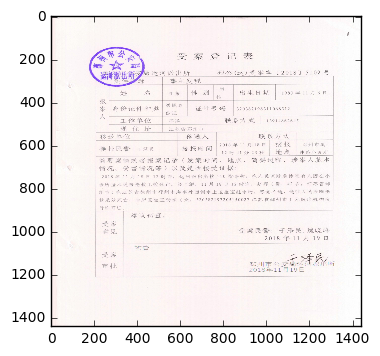

In [36]:
plt.imshow(images[0])

In [37]:
%time res = model.predict(images[0:1,:,:,:])

Wall time: 404 ms


In [38]:
res1 = res[0]
res1[res1>0.5]= 1
res1[res1<=0.5]= 0
newres1 = []
for i in range(5):
    n = np.logical_and(res1[:,:,5],res1[:,:,i]) * 255
    newres1.append(n)
newres1.append(res1[:,:,5]*255)

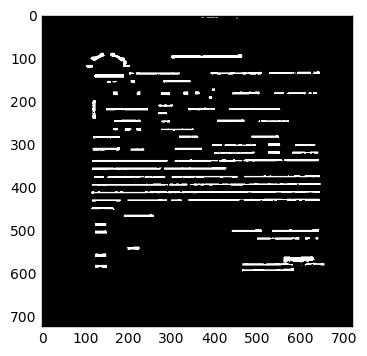

In [39]:
plt.imshow(newres1[0],cmap='gray')

In [40]:
_,regions = cv2.connectedComponents(newres1[0].astype('uint8'))

In [41]:
regions.shape

(720, 720)

In [42]:
from tool.utils import ufunc_4 , scale_expand_kernels ,fit_minarearectange,fit_boundingRect

Wall time: 101 ms
Wall time: 137 ms
[array([[369,   6],
       [369,   2],
       [407,   2],
       [407,   6]], dtype=int64), array([[112, 114],
       [104,  96],
       [143,  77],
       [152,  96]], dtype=int64), array([[196, 132],
       [146,  92],
       [163,  70],
       [214, 110]], dtype=int64), array([[291, 104],
       [291,  86],
       [467,  86],
       [467, 104]], dtype=int64), array([[ 98, 124],
       [ 98, 112],
       [121, 112],
       [121, 124]], dtype=int64), array([[386, 140],
       [386, 128],
       [512, 128],
       [512, 140]], dtype=int64), array([[589, 138],
       [589, 128],
       [625, 128],
       [625, 138]], dtype=int64), array([[627, 139],
       [627, 127],
       [645, 127],
       [645, 139]], dtype=int64), array([[196, 140],
       [196, 129],
       [214, 129],
       [214, 140]], dtype=int64), array([[214, 141],
       [214, 128],
       [322, 128],
       [322, 141]], dtype=int64), array([[522, 139],
       [522, 128],
       [589, 12

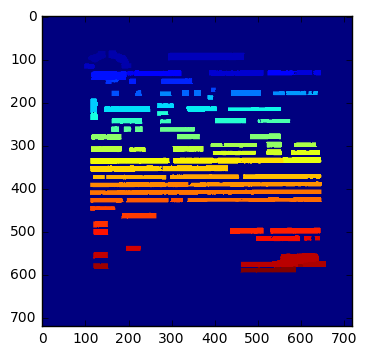

In [43]:
%time num_label,labelimage = scale_expand_kernels(newres1)
%time rects = fit_minarearectange(num_label,labelimage)
plt.imshow(labelimage)
print(rects)

In [44]:
labelimage[90,50]

0

In [45]:
imagetest = np.copy(images[0])
cv2.drawContours(imagetest,np.array(rects)*2,-1,(0,0,255),2)

array([[[251, 238, 236],
        [251, 238, 236],
        [251, 238, 236],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[251, 238, 236],
        [251, 238, 236],
        [251, 238, 236],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[251, 238, 236],
        [251, 238, 236],
        [251, 238, 236],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[252, 239, 237],
        [252, 239, 237],
        [251, 238, 236],
        ...,
        [253, 254, 250],
        [253, 254, 250],
        [253, 254, 250]],

       [[252, 239, 237],
        [252, 239, 237],
        [251, 238, 236],
        ...,
        [253, 254, 250],
        [253, 254, 250],
        [253, 254, 250]],

       [[251, 238, 236],
        [251, 238, 236],
        [251, 238, 236],
        ...,
        [253, 254, 253],
        [250, 251, 249],
        [253, 254, 253]]

True

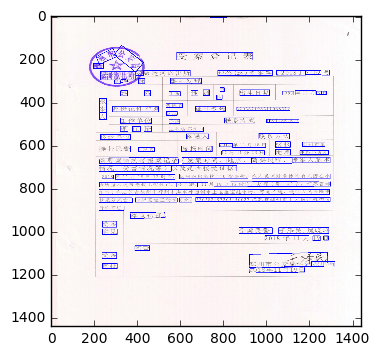

In [46]:
plt.imshow(imagetest)
cv2.imwrite('test2.jpg',imagetest)

In [39]:
h = r'E:\psenet-MTWI\document\mtwi_2018_task2_test\icpr_mtwi_task2\image_test\LB1gXi2JVXXXXXUXFXXXXXXXXXX.jpg'
images=cv2.imdecode(np.fromfile(h,dtype=np.uint8),-1) 
#images=cv2.cvtColor(images,cv2.COLOR_RGB2BGR)
cv2.imwrite(r'E:\tmp.jpg',images)

True

In [29]:
## todo
* 大概有100张图片没读出来 Y
* 把评测代码加上       
* 换backone
* 弧形文本行
* 强交叉文本行
* 误检太多